In [15]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import platform
from matplotlib import font_manager, rc # Runtime Configuration
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [ ]:
# https://nbviewer.jupyter.org/
# github에서 ipynb file 안 열릴 떄 

In [2]:
df = pd.read_csv('bicycle5.csv', encoding='utf-8')
df

,Unnamed: 0,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
0,0,2018-12-02,14,1366,1366. 일신초등학교 옆,정기권,30대,M,2.43,0.32,7.59,2018,12
1,1,2018-06-16,12,1675,1675. 월계문화체육센터,단체권,30대,F,31.01,3.20,9.69,2018,6
2,2,2018-07-03,11,567,567. 성수역 2번출구 앞,정기권,70대~,M,3.73,0.72,5.18,2018,7
3,3,2018-04-21,11,3102,3102. 연희삼거리,정기권,30대,M,3.01,0.28,10.75,2018,4
4,4,2019-09-30,19,111,111. 상수역 2번출구 앞,정기권,20대,M,1.70,0.20,8.50,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701468,701468,2020-03-02,18,1288,1288. 문정중교 사거리,일일권,30대,M,12.64,1.55,8.15,2020,3
701469,701469,2018-08-22,8,714,714. 한국SGI 양천문화회관 앞,정기권,20대,F,1.38,0.17,8.12,2018,8
701470,701470,2020-07-01,17,2621,2621. 한성백제역 2번 출구,정기권,70대~,NaN,1.07,0.27,3.96,2020,7
701471,701471,2018-04-16,15,305,305. 종로구청 옆,정기권,40대,F,2.83,0.40,7.08,2018,4


In [3]:
del df['Unnamed: 0']
df.head()

,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
0,2018-12-02,14,1366,1366. 일신초등학교 옆,정기권,30대,M,2.43,0.32,7.59,2018,12
1,2018-06-16,12,1675,1675. 월계문화체육센터,단체권,30대,F,31.01,3.20,9.69,2018,6
2,2018-07-03,11,567,567. 성수역 2번출구 앞,정기권,70대~,M,3.73,0.72,5.18,2018,7
3,2018-04-21,11,3102,3102. 연희삼거리,정기권,30대,M,3.01,0.28,10.75,2018,4
4,2019-09-30,19,111,111. 상수역 2번출구 앞,정기권,20대,M,1.70,0.20,8.50,2019,9


In [8]:
# Pandas 에서 조건에 맞는 컬럼에서 단일값 바꾸기
# ## 단일값 바꾸는 부분             # https://developer-ping9.tistory.com/111

# 1. Index 기반 접근방법 
# df.at[4,'dest_loc'] = '홍대'          # 4행, 'dest_loc'칼럼 값을 홍대로 변경

# 2. True/False 기반 접근 방법
# df[(df['col_name'] == '대명동')] = '홍대'     # 'dest_loc'칼럼 中 '대명동'과 일치하는 데이터
                                              # '홍대'로 일괄변경
df[(df['성별'] == 'f')] = 'F'

In [9]:
df['성별'].value_counts(ascending=True, dropna=False)
# f : 112 , F : 172529 --> F : 172641

m         181
\N       3690
F      172641
NaN    239841
M      285120
Name: 성별, dtype: int64

In [10]:
df[(df['성별'] == 'm')] = 'M'
df['성별'].value_counts(ascending=True, dropna=False)

\N       3690
F      172641
NaN    239841
M      285301
Name: 성별, dtype: int64

In [30]:
# 특정 row 값이 있는 row 제거 
#               연령대 안  F M 
#               대여시간 안 F M 
df['대여시간(24)'].str.contains('M').sum()
# 2) 삭제방법 1 : 조건 만족 행의 index 추출 --> drop 
idx = df[df['대여시간(24)']=='M'].index 
df.drop(idx, inplace=True)

In [31]:
df['대여시간(24)'].value_counts()

18    62498
17    49650
19    49481
20    43944
21    41911
16    40118
8     39880
22    36740
15    35665
14    32736
13    30310
12    28838
23    26420
9     26036
11    25009
7     24758
0     22175
10    21689
1     18247
2     13178
6     11107
3      8925
4      5938
5      5927
F       112
Name: 대여시간(24), dtype: int64

In [32]:
df['대여시간(24)'].str.contains('F').sum()
# 2) 삭제방법 1 : 조건 만족 행의 index 추출 --> drop 
idx = df[df['대여시간(24)']=='F'].index 
df.drop(idx, inplace=True)

In [33]:
df['대여시간(24)'].value_counts()

18    62498
17    49650
19    49481
20    43944
21    41911
16    40118
8     39880
22    36740
15    35665
14    32736
13    30310
12    28838
23    26420
9     26036
11    25009
7     24758
0     22175
10    21689
1     18247
2     13178
6     11107
3      8925
4      5938
5      5927
Name: 대여시간(24), dtype: int64

In [34]:
df['연령대'].str.contains('F').sum()
idx = df[df['연령대']=='F'].index 
df.drop(idx, inplace=True)

In [35]:
df['연령대'].str.contains('M').sum()
idx = df[df['연령대']=='M'].index 
df.drop(idx, inplace=True)

In [36]:
df['연령대'].value_counts()

20대     313988
30대     172220
40대     107051
50대      56831
~10대     29555
60대      14659
70대~      3929
Name: 연령대, dtype: int64

In [ ]:
# Pandas 에서 조건에 맞는 컬럼에서 여러값 바꾸기
# col1과 col2에 괄호<(,)> 를 포함한 값을 모두 괄호안의 값으로 변경

# # 1. True/False 기반 For 문 접근 방법 (비추천)
# 연산속도 엄청느림 + CopyWarning 발생 (되긴함)

# 2. Pandas apply 메소드 기반 접근방법 (강추!)

# 연산속도 엄청빠름

In [ ]:
# 연령대 비율 
# 1. 년 별 
# 2. 월 별                                이용수 
# 3. 성별                               이용 수 & 비율
# 4. 연령대 별
# 5. 평균 속도, 사용시간 (년도 별, 월 별 )

In [13]:
df.describe()

,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
count,701473,701473,701473,701473,701473,698526,461632,701473.00,701473.0,701473.0,701473,701473
unique,1404,26,2106,3586,12,9,3,6295.00,362.0,4040.0,6,14
top,2020-07-11,18,113,502. 뚝섬유원지역 1번출구 앞,정기권,20대,M,0.87,0.1,10.0,2019,7
freq,1819,62498,2378,1324,484872,313988,285301,2252.00,27474.0,3849.0,297704,87012


In [25]:
import json 
from collections import Counter

In [37]:
age_counts = df['연령대'].value_counts()
age_counts

20대     313988
30대     172220
40대     107051
50대      56831
~10대     29555
60대      14659
70대~      3929
Name: 연령대, dtype: int64

<AxesSubplot:>

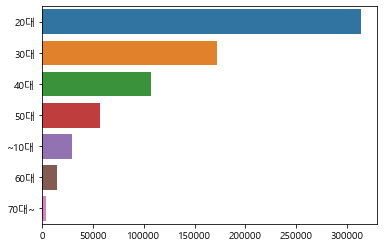

In [38]:
sns.barplot(y=age_counts.index, x=age_counts.values)

In [39]:
df.head()

,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
0,2018-12-02,14,1366,1366. 일신초등학교 옆,정기권,30대,M,2.43,0.32,7.59,2018,12
1,2018-06-16,12,1675,1675. 월계문화체육센터,단체권,30대,F,31.01,3.2,9.69,2018,6
2,2018-07-03,11,567,567. 성수역 2번출구 앞,정기권,70대~,M,3.73,0.72,5.18,2018,7
3,2018-04-21,11,3102,3102. 연희삼거리,정기권,30대,M,3.01,0.28,10.75,2018,4
4,2019-09-30,19,111,111. 상수역 2번출구 앞,정기권,20대,M,1.7,0.2,8.5,2019,9


In [40]:
df['대여권'].unique()

정기권         484872
일일권         114962
정기           69948
일일(회원)       18676
단체권           4316
일일(비회원)       4243
정기(2시간권)      2193
일일(2시간권)      1438
단체             504
일일권(비회원)        28
Name: 대여권, dtype: int64

In [ ]:
# del 단체권, 단체 

# 삭제방법 2 : 해당 열에 해당하는 Pandas Series 선택 --> != row만 df1 에 새로 저장 
# df1['대여소명'].str.contains('위트콤').sum()    #49
# df1 = df1[df1.대여소명 !='위트콤']
# df1

# 삭제방법 1
# df['연령대'].str.contains('F').sum()
# idx = df[df['연령대']=='F'].index 
# df.drop(idx, inplace=True)

In [41]:
df['대여권'].str.contains('단체권').sum()
idx = df[df['대여권']=='단체권'].index 
df.drop(idx, inplace=True)

In [43]:
df['대여권'].unique()

array(['정기권', '정기', '일일(회원)', '일일권', '일일(비회원)', '일일(2시간권)', '정기(2시간권)',
       '단체', '일일권(비회원)'], dtype=object)

In [44]:
df['대여권'].str.contains('단체').sum()
idx = df[df['대여권']=='단체'].index 
df.drop(idx, inplace=True)

In [45]:
df['대여권'].unique()

array(['정기권', '정기', '일일(회원)', '일일권', '일일(비회원)', '일일(2시간권)', '정기(2시간권)',
       '일일권(비회원)'], dtype=object)

In [ ]:
# 정기, 정기(2시간권) -> 정기권 
# 일일(2시간권), 일일(회원), 일일(비회원), 일일권(비회원) --> 일일권 

In [50]:
# Pandas 에서 조건에 맞는 컬럼에서 단일값 바꾸기

# df['대여권'].value_counts()                        
                                # # 정기권         484872
                                # 일일권         114962
                                # 정기           69948
                                # 일일(회원)       18676
                                # 일일(비회원)       4243
                                # 정기(2시간권)      2193
                                # 일일(2시간권)      1438
                                # 일일권(비회원)        28
                                
df[(df['대여권'] == '정기')] = '정기권'
df[(df['대여권'] == '정기(2시간권)')] = '정기권'
df[(df['대여권'] == '일일(2시간권)')] = '일일권'
df[(df['대여권'] == '일일(회원)')] = '일일권'
df[(df['대여권'] == '일일(비회원)')] = '일일권'
df[(df['대여권'] == '일일권(비회원)')] = '일일권'

In [51]:
df['대여권'].value_counts() 

정기권    557013
일일권    139347
Name: 대여권, dtype: int64

In [57]:
# 연령대 & 대여권 

age_counts = df['연령대'].value_counts()
membership_type = df['대여권'].value_counts()

<AxesSubplot:>

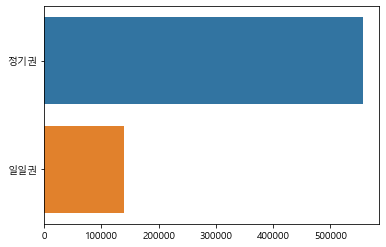

In [60]:
sns.barplot(y=membership_type.index, x=membership_type.values)

In [66]:
age = df['연령대']
membership = df['대여권']

In [68]:
df2 = pd.merge(age, membership, left_index=True, right_index=True, how='left')
df2

,연령대,대여권
0,30대,정기권
2,70대~,정기권
3,30대,정기권
4,20대,정기권
5,50대,정기권
...,...,...
701468,30대,일일권
701469,20대,정기권
701470,70대~,정기권
701471,40대,정기권


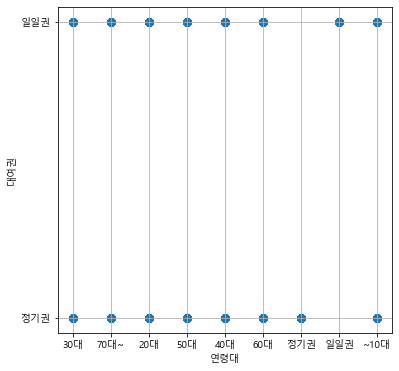

In [69]:
plt.figure(figsize=(6,6))

plt.scatter(df2['연령대'], df2['대여권'], s=50)

plt.xlabel('연령대')
plt.ylabel('대여권') 
plt.grid()
plt.show()

In [ ]:
# from pyecharts import Bar from pyecharts